### Exercise 3: Pandas

This week we looked at data management, cleaning, and parsing. This is a lot! You've learned all of the following:

- Dictionaries in Python
- Dictionary manipulation
- Pandas
- Importing data
- Indexing and selecting from dataframes
- Filtering dataframes
- Looping and calculations for dataframes
- Basics of matplotlib
- Line and scatter plots
- Data wrangling
- Histograms
<hr>
<img src="img/map_ex1.jpg" style="width:49%;float:left;margin:20px;">

<h1>This week, we're using the Pandas library to clean, parse, and understand data about taxi rides in NYC.</h1>
<hr>
This exercise starts with raw data containing ~23 million taxi rides from January of 2019 and transform it into a usable, understandable format (a visualization!).

This exercise asks you to apply those skills in order to better understand how to apply them to real world scenarios and more sophistocated computational challenges.

## Fill out this python notebook, then save it in the following format: <i>yourname_ex2.ipynb</i>. <br><br> Submit a screenshot of your visualization, your <code>.csv</code>, and <code>.ipynb</code> files on stellar in a zip archive.
<hr>

## 3.1 Getting started with NYC Taxi Data

1. Import pandas and give it the alias pd
2. Download the January 2019 For-Hire vehicle data set from NYC, <a href="https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2019-01.csv" target="_blank">available here</a>, and read in the CSV, calling it <code>raw_data</code>. This will take a while! The metdata dictionary for this data is available <a href="https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_fhv.pdf" target="_blank">here</a>. Give it a read while you wait for the import to complete.
3. Start by printing the head of the data. You'll notice some of the columns say NaN or "Not a Number." This is no good! Let's take a closer look at the data frame and come back to this. 
4. Print the number of columns, and print the number of entries.
5. Print the column names. Print the column data types.
6. Now, let's fix those invalid entries. Filter the data for only valid entries with <code>PULocationID</code> and <code>DOLocationID</code> data. Create a new dataframe and call it <code>filtered_data</code>.
8. Print the new number of rows in <code>filtered_data</code> to see how many rows were invalid. 
9. Convert <code>pickup_datetime</code> and <code>dropoff_datetime</code> columns to <code>datetime</code> format. Print the datatypes of your dataframe to confirm the conversion worked.

In [1]:
# 1 Import pandas

import pandas as pd

In [24]:
# 2 download the data and import the data as raw_data

raw_data = pd.read_csv("data/fhv_tripdata_2019-01.csv")

In [25]:
# 3 print the head of the data

print(raw_data.head())

  dispatching_base_num      pickup_datetime     dropoff_datetime  \
0               B00001  2019-01-01 00:30:00  2019-01-01 02:51:55   
1               B00001  2019-01-01 00:45:00  2019-01-01 00:54:49   
2               B00001  2019-01-01 00:15:00  2019-01-01 00:54:52   
3               B00008  2019-01-01 00:19:00  2019-01-01 00:39:00   
4               B00008  2019-01-01 00:27:00  2019-01-01 00:37:00   

   PULocationID  DOLocationID  SR_Flag  
0           NaN           NaN      NaN  
1           NaN           NaN      NaN  
2           NaN           NaN      NaN  
3           NaN           NaN      NaN  
4           NaN           NaN      NaN  


In [42]:
# 4 print the number of columns, and the number of entries

print(raw_data.shape[1]) # the number of columns
print(raw_data.shape[0]) # the number of entries

6
23130810


In [54]:
# 5 print the column names and data types

print(raw_data.columns.values)
print(raw_data.dtypes)

['dispatching_base_num' 'pickup_datetime' 'dropoff_datetime'
 'PULocationID' 'DOLocationID' 'SR_Flag']
dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID            float64
DOLocationID            float64
SR_Flag                 float64
dtype: object


In [78]:
# 6 filter the data for only valid entries. Hint: Filter for values that are not NaN in columns PULocationID and DOLocationID. Call your new dataframe
import numpy as np

filtered_data = raw_data[~np.logical_or(raw_data['PULocationID'].isna(), raw_data['DOLocationID'].isna())]

In [79]:
# 7 Print the new number of rows

print(filtered_data.shape[0])

21306221


In [82]:
# 8 convert columns pickup_datetime and dropoff_datetime to datetime data types. Print the data types for filtered_data

filtered_data.loc[:, 'pickup_datetime'] = pd.to_datetime(filtered_data['pickup_datetime'])
filtered_data.loc[:, 'dropoff_datetime'] = pd.to_datetime(filtered_data['dropoff_datetime'])
print(filtered_data.dtypes)

dispatching_base_num            object
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                   float64
DOLocationID                   float64
SR_Flag                        float64
dtype: object


# 2.2 Parsing Data

Now that you have a cleaned data frame, you can start to do some analysis! Before we can plug this in to a visualization, we need to parse down the information, separate signal from noise. To do so, we're aiming to find the frequency of trips to and from each taxi zone (PULocationID and DOLocationID). Along the way, we'll do a little data exploration and exploratory visualization.

1. Print the first entry and take a look at what the data contains.
2. Find the unique entries for pickup and dropoff zones.
3. Find the start and end dates from the pickup datetime.
4. Derive a new column that rounds each pickup datetime to the date of the month.
5. Get the number of pickups for each day.
6. Make a time-series visualization of the number of pickups each day. You can use either panda's built-in plot function or matplotlib.
7. Create a new dataframe that groups <code>filtered_data</code> by the pickup and dropoff location, and contains the frequency of trips for each of these pairs. Call this new dataframe <code>od_pairs</code>.
8. Rename the new column with the number of rides "frequency" -- by default it will be called '0'.
9. Make a plot of the first 1,000 rows. Use the pickup and dropoff location as X/Y values, and scale each dot by the frequency of trips. Use matplotlib.
10. Create a new dataframe that groups filtered_data by the pickup location and day, and contains the frequency of trips for each of these pairs. Call this new dataframe o_daily_pairs.
11. Lastly, Make a multiline-plot of first 10 PULocationID's daily pick up freqency from o_daily_pairs. Use different color to label different Pick up location ID. Hint: use for-loop to enumerate through your first 10 PULocation ID. Not sure how to make multiline-plot? Refer here: https://python-graph-gallery.com/124-spaghetti-plot/


In [85]:
# 1 print the first entry in the data frame

print(filtered_data.iloc[[0]])

    dispatching_base_num     pickup_datetime    dropoff_datetime  \
101               B00254 2019-01-01 00:33:03 2019-01-01 01:37:24   

     PULocationID  DOLocationID  SR_Flag  
101         140.0          52.0      NaN  


In [87]:
# 2 find the unique entries for pickup zone

print(filtered_data['PULocationID'].unique())

[140. 141. 237. 162. 145. 261.  13. 249. 236. 171. 252. 265. 229.  16.
  88.  87. 206. 221. 245. 181. 195. 138.  25.  89.  70.   7. 173.  82.
  71. 188.  72. 129.  56. 189.  32.  81.  51. 254. 232.  92.  53. 192.
  15. 132. 175. 121. 135. 156. 187.  90.  48. 112.  18. 127. 243. 144.
 224. 263. 239. 210. 147. 126. 168. 223.  41. 119. 205.  38. 255.  37.
  17. 161. 163. 172. 251. 233. 260. 211.  43. 102.  36.  76. 122. 159.
 213. 226. 179. 167.  69.  47. 148.  78. 235. 259. 231.  68.  61.  49.
 106.  66. 146. 174.   3. 225.  94. 191.  35.  29.  97. 182. 170. 247.
  33.  65. 256. 176.  50. 228.  93.  80.  40. 164. 113. 107. 183. 134.
  95. 196.  45. 244. 136. 198.  62.  52. 257.  79.  85.  14. 116. 131.
  22. 222. 185. 152.  24. 158. 262. 169. 212.  98. 149.  74. 220. 200.
 178. 248.  42. 177. 160. 123.  11. 203. 216.  21. 108. 142. 120. 166.
  26. 114.  20. 234. 151. 258. 130.  60. 241. 117.   5.  84. 109. 157.
 143. 242.   4. 137. 209. 197.  75.  39.  86. 238. 227. 246. 125. 193.
  91. 

In [88]:
# 2 find the unique entries for dropoff zone

print(filtered_data['DOLocationID'].unique())

[ 52. 237. 236.  85. 246. 224.  14. 233.  87. 229.  16.  15.  82.  92.
 252.  70. 223.  98.  74. 206. 156.  61. 211. 257.  65.  39. 181. 129.
 179. 173. 265.  71.  56.  72.   3. 254.  81. 259.  51.  83.  73.  93.
 192.  67. 135.   6. 221.  48. 144. 112. 145. 225.  54.  78. 244. 243.
  79. 263.  41. 210. 126. 168.  42. 119. 146.  26. 205. 196.  37.  17.
  62. 262. 162. 142. 141. 134. 251. 245. 186.   7.  36.  77. 130. 213.
 250. 116.  80. 235. 242.  69. 169. 248. 167. 182. 118.  68.  25. 255.
  31. 258. 241. 131. 228.  55.  33. 133. 230. 158. 238.  95. 170. 188.
 136. 177.  89. 226. 148. 106. 203.  66. 195. 107. 185.  47. 232. 239.
  97. 164. 151. 174.  11. 234. 100. 163.  49. 231. 202. 193. 149. 165.
  91. 155.  76.  63. 189. 161. 198. 200. 220.  90. 247.  35. 160.  29.
  22. 214. 143. 132. 121. 178.  13. 147. 127.  60. 140.  75. 166.  50.
 261.  21. 152. 114.  38.  10.  28.  19.  64. 139. 176.  20. 217. 249.
 240. 159.  94.  18. 208. 123. 197. 256. 157.  24. 227.  45.  43. 222.
 137. 

In [90]:
# 3 find the min and max for the pickup datetime

print(filtered_data['pickup_datetime'].min())
print(filtered_data['pickup_datetime'].max())

2019-01-01 00:00:01
2019-01-31 23:59:59


In [146]:
# 4 Derive a new column that rounds each pickup datetime to the date of the month. Print the data head.

filtered_data.loc[:, 'pickup_date'] = filtered_data['pickup_datetime'].sub(pd.Timestamp('2018-12-31')).dt.days
print(filtered_data.head())

    dispatching_base_num     pickup_datetime    dropoff_datetime  \
101               B00254 2019-01-01 00:33:03 2019-01-01 01:37:24   
102               B00254 2019-01-01 00:03:00 2019-01-01 00:34:25   
103               B00254 2019-01-01 00:45:48 2019-01-01 01:26:01   
104               B00254 2019-01-01 00:37:39 2019-01-01 01:44:59   
105               B00254 2019-01-01 00:35:06 2019-01-01 01:30:21   

     PULocationID  DOLocationID  SR_Flag  pickup_date  
101         140.0          52.0      NaN            1  
102         141.0         237.0      NaN            1  
103         237.0         236.0      NaN            1  
104         162.0          85.0      NaN            1  
105         237.0         246.0      NaN            1  


/Users/weihe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [147]:
# 5 Get the number of pickups for each day

filtered_data['pickup_date'].value_counts()

26    879289
12    843789
31    827909
19    801848
25    797619
11    791424
24    760298
18    756227
20    747999
30    732422
13    724547
27    722068
21    702682
5     698238
17    694424
1     678779
22    676379
29    668192
10    667096
16    649679
23    646378
15    640820
6     637393
14    631026
28    607919
9     597473
4     582485
7     582300
8     568411
3     505100
2     486008
Name: pickup_date, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12144e668>]],
      dtype=object)

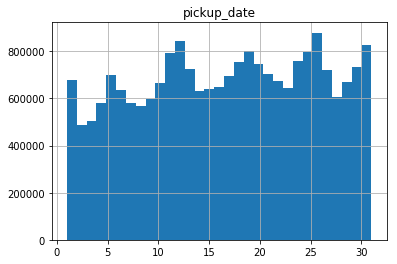

In [151]:
# 6 Create a time series chart of rides per day

filtered_data.hist(column='pickup_date', bins=31)

In [170]:
# 7 Create a new dataframe that groups filtered_data by the pickup and dropoff location, and contains the frequency of trips for each of these pairs. Call this new dataframe od_pairs.

od_pairs = filtered_data.groupby(['PULocationID','DOLocationID']).size().reset_index()
print(od_pairs.head())

   PULocationID  DOLocationID    0
0           0.0           0.0  215
1           1.0           1.0   25
2           1.0           4.0   16
3           1.0           5.0    1
4           1.0           7.0    9


In [193]:
# 8 Rename the column that has the frequency of each pair to "frequency". Hint: By default it will the last column, and called '0'.

od_pairs = od_pairs.rename(columns={0: 'frequency'})
print(od_pairs.head())

   PULocationID  DOLocationID  frequency
0           0.0           0.0        215
1           1.0           1.0         25
2           1.0           4.0         16
3           1.0           5.0          1
4           1.0           7.0          9


Text(0, 0.5, 'dropoff Location ID')

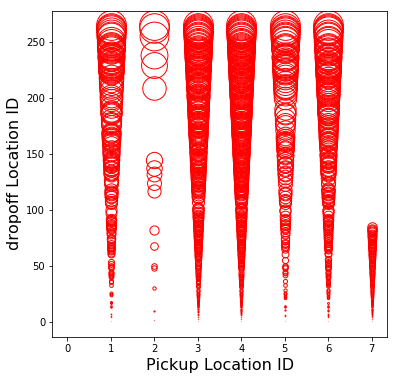

In [205]:
# 9 Make a plot of the first 1,000 rows of od_pairs, scaled by the frequency of trips

from itertools import islice
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

max_freq = od_pairs.iloc[0:1000,-1].max()
for lab, row in islice(od_pairs.iterrows(), 1000):
    ax.plot(row["PULocationID"], row["DOLocationID"], 'ro', fillstyle = 'none', 
            markersize = 3000*row["DOLocationID"]/max_freq)
    
ax.set_xlabel('Pickup Location ID', fontsize=16)
ax.set_ylabel('dropoff Location ID', fontsize=16)

In [207]:
# 10 Create a new dataframe that groups filtered_data by the pickup location and day, and contains the frequency of trips for each of these pairs. Call this new dataframe o_daily_pairs.

o_daily_pairs = filtered_data.groupby(['PULocationID','pickup_date']).size().reset_index()
print(o_daily_pairs.head())

   PULocationID  pickup_date   0
0           0.0            2  16
1           0.0            3   8
2           0.0            4   9
3           0.0            5   8
4           0.0            7  10


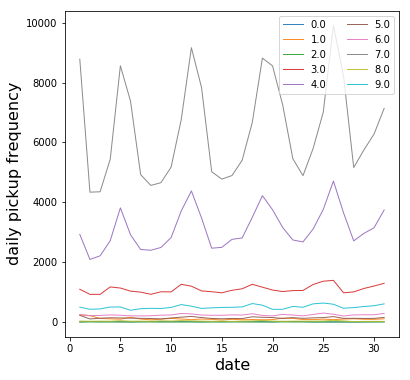

In [231]:
# 11 Make a multiline-plot of first 10 PULocationID's daily pick up freqency from o_daily_pairs.
#use different color to label different Pick up location ID
#Hint: use for-loop to enumerate through your first 10 PULocation ID
#forgot how to make multiline-plot? Refer here: https://python-graph-gallery.com/124-spaghetti-plot/

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

myPULocationID = [0.0]  # list to store the PULocation ID
days = list(range(1,32))
freq = np.zeros(31)
for lab, row in o_daily_pairs.iterrows():
    if row['PULocationID'] != myPULocationID[-1]: # find a new PULocation ID
        ax.plot(days, freq, marker='', linewidth=1, alpha=0.9, label=myPULocationID[-1]) # plot daily frequency data for the previous PULocation ID
        freq = np.zeros(31)  # reset frequency array to 0
        myPULocationID.append(row['PULocationID']) # add the new PULocation ID to the ID list
    if len(myPULocationID) > 10: # stop iteration if there are more than 10 PULocation ID
        break
    freq[int(row['pickup_date']-1)] = row[0] # save the frequency data to the frequency array
    
    
ax.set_xlabel('date', fontsize=16)
ax.set_ylabel('daily pickup frequency', fontsize=16)
ax.legend(loc='best', ncol=2)


# 2.3 Merging Data

For this last section, we'll be putting all this together so you could use this data! 

1. We've provided a CSV with the centroids (center point) for each taxi zone in NYC. Import the data, and call the dataframe <code>taxi_zones</code>.
2. Merge your od_pairs dataframe with the taxi_zones two times, once for the pickup and once for the dropoff. Your dataframe should have seven columns: PULocationID, DOLocationID, frequency, objectedid_x, lat_PU, lon_PU, objectid_y, lat_DO, lon_DO.
3. Drop the objectid columns that you gained in the merge. We got these during the merge from the taxi zone data, but they are the same as the pickup and dropoff location IDs. 
4. Export the dataframe to a CSV!

In [232]:
# 1 import taxi_zones.csv -- name it taxi_zones

taxi_zones = pd.read_csv("data/taxi_zones.csv")

In [239]:
# 2 merge the OD_pairs data frame with the taxi_zones dataframe two times. Once for the pickup location and once for the dropoff location.
# rename the columns lat and lon suffixes _PU and _DO for pickup and dropoff, respectively. Hint: "lat_PU" / "lon_PU"

od_pairs = od_pairs.merge(taxi_zones, left_on='PULocationID', right_on='objectid')
od_pairs = od_pairs.merge(taxi_zones, left_on='DOLocationID', right_on='objectid')
od_pairs = od_pairs.rename(columns={'lat_x': 'lat_PU','lon_x': 'lon_PU','lat_y': 'lat_DO','lon_y': 'lon_DO'})
print(od_pairs.head())

   PULocationID  DOLocationID  frequency  objectid_x     lat_PU     lon_PU  \
0           1.0           1.0         25           1  40.691831 -74.174000   
1           3.0           1.0         13           3  40.864474 -73.847422   
2           4.0           1.0        395           4  40.723752 -73.976968   
3           5.0           1.0         85           5  40.552659 -74.188484   
4           6.0           1.0         96           6  40.600324 -74.071771   

   objectid_y     lat_DO  lon_DO  
0           1  40.691831 -74.174  
1           1  40.691831 -74.174  
2           1  40.691831 -74.174  
3           1  40.691831 -74.174  
4           1  40.691831 -74.174  


In [242]:
# 3 drop the extra objectid columns

od_pairs = od_pairs.drop(columns=['objectid_x', 'objectid_y'])
print(od_pairs.head())

   PULocationID  DOLocationID  frequency     lat_PU     lon_PU     lat_DO  \
0           1.0           1.0         25  40.691831 -74.174000  40.691831   
1           3.0           1.0         13  40.864474 -73.847422  40.691831   
2           4.0           1.0        395  40.723752 -73.976968  40.691831   
3           5.0           1.0         85  40.552659 -74.188484  40.691831   
4           6.0           1.0         96  40.600324 -74.071771  40.691831   

   lon_DO  
0 -74.174  
1 -74.174  
2 -74.174  
3 -74.174  
4 -74.174  


In [245]:
# 4 export the data to a CSV

od_pairs.to_csv("od_pairs.csv", index = False)

# 2.4 Visualizing your OD Pairs and Lat/Lons

Next week, we'll be getting in to visualization in earnest. For now, let's use a prepackaged tool to help us do some viz. 

1. Make sure you have your CSV, and head over to <a href="https://kepler.gl/demo" target="_blank">kepler.gl's demo site.</a>
<img src="img/screenshot_1.jpg" style="width:80%"><br>
2. Load up your data by dragging it or browse to the CSV.
<br><img src="img/screenshot_2.jpg">
<img src="img/screenshot_3.jpg"><br>
3. Use your data to create a new "Line" layer, and set the pickup lat/lng as the start and the dropoff lat/lng as the destination. 
<br><img src="img/screenshot_4.jpg"><br>
4. Under "Stroke" click the three dots and set the weight of the line to be the frequency. We can now start to see how this network connects!
<br><img src="img/screenshot_5.jpg"><br>
5. Finally, go to the filter tab along the top of the interface and include only OD pairs with more than 5000 rides. This cleans up the viz and makes it much more legible. If you want to, play around with the other settings, available layer types, and see what you like best.
6. Include a screenshot of your kepler.gl visualization along with your python notebook.

# You did it! Now, save your notebook, csv, and screenshot of your visualization in the following format: <i>yourname_ex2.ipynb</i>. <br><br> Submit a screenshot of your visualization, your <code>.csv</code>, and <code>.ipynb</code> files on stellar.

# If you are feeling bold, save first and then try the bonus problem below.

<hr>

# Bonus: Trips By Day, By Zone

<img src="img/map_ex3.gif">

Lots of visualization tools have powerful timeseries tools. Start by parsing the data to get the total number of trips picking up from each zone on each day. Then, use a tool like Kepler.gl or Carto to create a map that can click through the days of the month with dots for each taxi zone centroid, scaled to the number of trips. 

In [340]:
# replace the 'pickup_date' column with the date object
# then convert it to datetime data types

filtered_data.loc[:, 'pickup_date'] = filtered_data['pickup_datetime'].dt.normalize() + pd.Timedelta(seconds=1)
print(filtered_data.head())

    dispatching_base_num     pickup_datetime    dropoff_datetime  \
101               B00254 2019-01-01 00:33:03 2019-01-01 01:37:24   
102               B00254 2019-01-01 00:03:00 2019-01-01 00:34:25   
103               B00254 2019-01-01 00:45:48 2019-01-01 01:26:01   
104               B00254 2019-01-01 00:37:39 2019-01-01 01:44:59   
105               B00254 2019-01-01 00:35:06 2019-01-01 01:30:21   

     PULocationID  DOLocationID  SR_Flag         pickup_date  
101         140.0          52.0      NaN 2019-01-01 00:00:01  
102         141.0         237.0      NaN 2019-01-01 00:00:01  
103         237.0         236.0      NaN 2019-01-01 00:00:01  
104         162.0          85.0      NaN 2019-01-01 00:00:01  
105         237.0         246.0      NaN 2019-01-01 00:00:01  


/Users/weihe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [341]:
# Create a new dataframe that groups filtered_data by the pickup location and date, and contains the frequency of trips for each of these pairs

o_daily_pairs = filtered_data.groupby(['PULocationID','pickup_date']).size().reset_index()
print(o_daily_pairs.head())

   PULocationID         pickup_date   0
0           0.0 2019-01-02 00:00:01  16
1           0.0 2019-01-03 00:00:01   8
2           0.0 2019-01-04 00:00:01   9
3           0.0 2019-01-05 00:00:01   8
4           0.0 2019-01-07 00:00:01  10


In [342]:
# Rename the column that has the frequency of each pair to "frequency"

o_daily_pairs = o_daily_pairs.rename(columns={0: 'frequency'})
print(o_daily_pairs.head())

   PULocationID         pickup_date  frequency
0           0.0 2019-01-02 00:00:01         16
1           0.0 2019-01-03 00:00:01          8
2           0.0 2019-01-04 00:00:01          9
3           0.0 2019-01-05 00:00:01          8
4           0.0 2019-01-07 00:00:01         10


In [343]:
# merge the o_daily_pairs data frame with the taxi_zones dataframe once for the pickup location

o_daily_pairs = o_daily_pairs.merge(taxi_zones, left_on='PULocationID', right_on='objectid')
print(o_daily_pairs.head())

   PULocationID         pickup_date  frequency  objectid        lat     lon
0           1.0 2019-01-01 00:00:01        238         1  40.691831 -74.174
1           1.0 2019-01-02 00:00:01        211         1  40.691831 -74.174
2           1.0 2019-01-03 00:00:01        117         1  40.691831 -74.174
3           1.0 2019-01-04 00:00:01        105         1  40.691831 -74.174
4           1.0 2019-01-05 00:00:01         93         1  40.691831 -74.174


In [344]:
# drop the extra objectid columns

o_daily_pairs = o_daily_pairs.drop(columns=['objectid'])
print(o_daily_pairs.head())

   PULocationID         pickup_date  frequency        lat     lon
0           1.0 2019-01-01 00:00:01        238  40.691831 -74.174
1           1.0 2019-01-02 00:00:01        211  40.691831 -74.174
2           1.0 2019-01-03 00:00:01        117  40.691831 -74.174
3           1.0 2019-01-04 00:00:01        105  40.691831 -74.174
4           1.0 2019-01-05 00:00:01         93  40.691831 -74.174


In [345]:
# export the data to a CSV

o_daily_pairs.to_csv("o_daily_pairs.csv", index = False)